<h1> <center> A Brief Analysis of Central/Southern Mid-Atlantic Ridge Seismicity </h1> </center>

*****************

<b> Guilherme Zakarewicz de Aguiar </b>

<b> University of Brasília (UnB), Brazil </b>

******************

The Mid-Atlantic Ridge is a mid-ocean ridge, one of the largest geological features on the planet. Nevertheless, there have been few regional observations of earthquakes sequences along mid-ocean ridges due to the limited spatial coverage provided by the global seismic networks (Simão et. al, 2010), mainly due to the physical difficulty of installing seismographic stations in the ocean. As a consequence of the divergent motion between North American - Eurasian and South American - African Plates, 
there is a continuous occurrence of earthquakes of varying magnitudes. A significant amount of research was done concerning the seismic release of stress in the Atlantic Ocean Crust since the last few decades, as done by Horning et. al, 2018, and the teleseismic catalog by Wysession et. al, 1995. The principal aim of these studies is to understand the forces that cause oceanic plates to move (Stein and Okal, 1986). 

This work aims to briefly analyze the Central Mid-Atlantic Ridge seismicity over the last 50 years from the events distribution over time. In addition, an analysis of a 6.9 Mw magnitude event that occurred on September 19, 2020 was also carried out using seismograms and spectrograms from five different stations. We will focus on the South American - African Plates boundaries.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


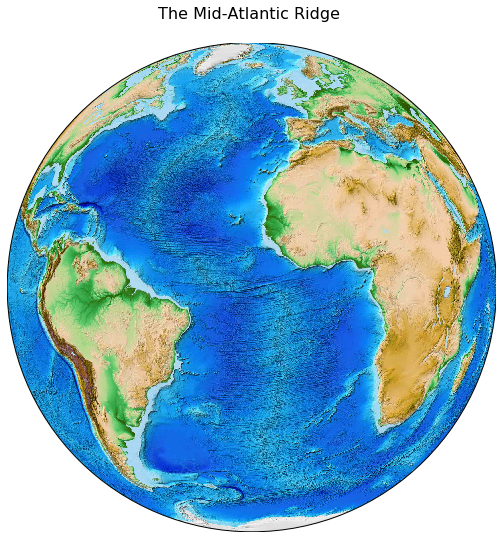

In [1]:
import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(18,9))
m = Basemap(projection='ortho', lat_0=0, lon_0=-20, resolution='l')
m.etopo()
plt.title("The Mid-Atlantic Ridge \n", fontsize=16)
plt.show()

#### Importing lybraries 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from obspy import UTCDateTime
from obspy.clients.fdsn.header import URL_MAPPINGS
from obspy.clients.fdsn import Client
import matplotlib.dates as mdates 
client = Client("IRIS")

#### Setting search parameters (events)

In [3]:
startt = UTCDateTime("1970-01-01T00:01:00")
endt = UTCDateTime("2020-09-20T00:01:00")

min_lat = -30
max_lat = 13
min_lon = -42.2
max_lon = 5

ev = client.get_events(starttime=startt, endtime=endt, minlatitude=min_lat, minlongitude=min_lon, maxlatitude=max_lat, maxlongitude=max_lon)
print(ev)

5222 Event(s) in Catalog:
2020-09-19T20:58:16.728000Z |  -0.081,  -18.087 | 4.6 mb
2020-09-18T21:43:58.936000Z |  +0.917,  -26.841 | 6.9 Mww
...
1970-01-22T02:05:29.400000Z | +11.000,  -41.400 | 4.4 mb
1970-01-04T17:37:21.000000Z |  -8.400,  -21.200 | 4.8 None
To see all events call 'print(CatalogObject.__str__(print_all=True))'


<i> The events can also be requested in a CSV format using the IRIS Web Services (url: https://service.iris.edu/fdsnws/event/1/query?starttime=1970-01-01T00:01:00&endtime=2020-09-20T00:01:00&orderby=time&format=geocsv&maxlat=13&minlon=-42.2&maxlon=5&minlat=-30&nodata=404) </i>

In [4]:
df = pd.read_csv("fdsnws-event_2020-09-26T17_44_54Z.txt",sep="|",header=None)
print(df.head())

lat = df[2]
lon = df[3]
depth = df[4]

         0                     1        2        3     4         5         6   \
0  11315954  2020-09-19T20:58:16Z  -0.0807 -18.0865  10.0        us  NEIC PDE   
1  11312466  2020-09-18T21:43:58Z   0.9167 -26.8408  10.0  pt,at,us  NEIC PDE   
2  11311667  2020-09-17T03:00:17Z   7.8718 -37.0393  10.0        us  NEIC PDE   
3  11313223  2020-09-14T13:23:04Z   0.8312 -30.1649  10.0        us  NEIC PDE   
4  11312149  2020-09-11T23:54:12Z -15.5620 -13.2277  10.0        us  NEIC PDE   

   7           8    9    10  11                           12  
0  us  us6000c0ig   mb  4.6  us   CENTRAL MID-ATLANTIC RIDGE  
1  us  pt20262001  Mww  6.9  us   CENTRAL MID-ATLANTIC RIDGE  
2  us  us7000bp8n  Mww  5.7  us   CENTRAL MID-ATLANTIC RIDGE  
3  us  us7000bpsw   mb  4.5  us   CENTRAL MID-ATLANTIC RIDGE  
4  us  us7000bnzj   mb  5.0  us  SOUTHERN MID-ATLANTIC RIDGE  


#### Plotting Location X Depth

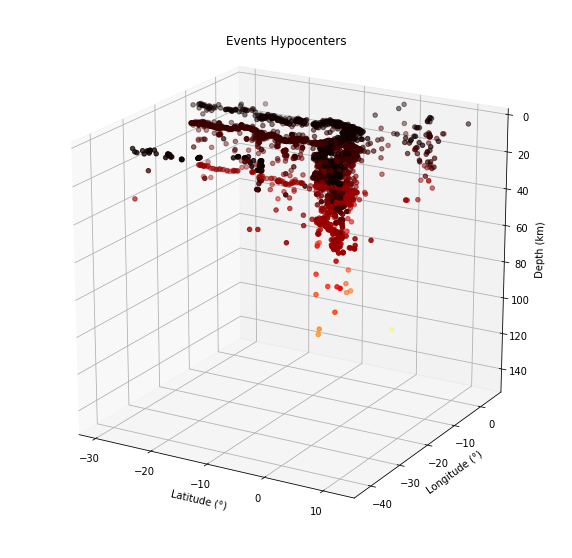

In [5]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(projection='3d')
ax1.invert_zaxis()
ax1.set_xlabel('Latitude (°)')
ax1.set_ylabel('Longitude (°)')
ax1.set_zlabel('Depth (km)')
ax1.set_zlim(150,0)
ax1.set_title("Events Hypocenters")
ax1.scatter(lat, lon, depth, c=depth, cmap="hot")
ax1.view_init(20)
plt.show()

The 3D graph shows that most of the events occurred in shallow depths (< 40 km), which is normal for oceanic plates, which are thinner.

There were approximately 5200 earthquakes detected between 1st January, 1970 and 20th September, 2020.

#### Storing the time and magnitudes in separated lists

In [6]:
times = [] 
mags = [] 

for event in ev: 
    times.append(event.origins[0].time.datetime) 
    mags.append(event.magnitudes[0].mag)
    
mtimes = mdates.date2num(times)

#### Plotting Time X Magnitude

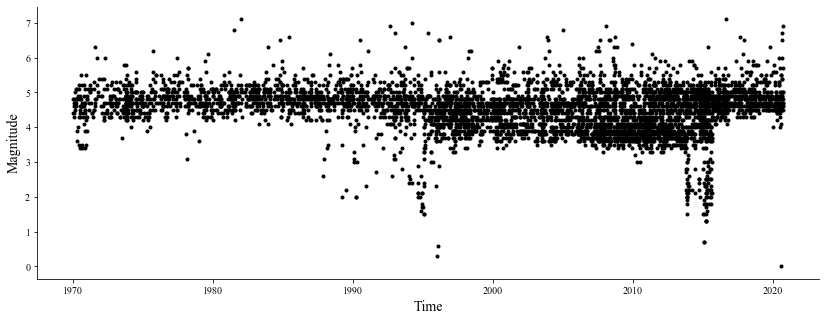

In [7]:
csfont = {'fontname':'Times New Roman'}

fig=plt.figure(figsize=(14,5))
ax2=fig.add_subplot(111)
ax2.plot(times,mags,'.k', linewidth=0.2)
ax2.set_xlabel("Time",**csfont, fontsize = 14)
ax2.set_ylabel("Magnitude",**csfont, fontsize = 14)
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
for tick in ax2.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax2.get_yticklabels():
    tick.set_fontname("Times New Roman")
plt.show()

Most earthquakes have a magnitude between 4 and 6, with some events with a magnitude less than 3 recorded between 1987 - 1995 and 2013 - 2016. There are no events with magnitude greater than 7.1. Since 2016, it is possible to notice a tendency of identify only events of magnitude greater than 4.

#### Plotting Time X Number of Events (bar graph)

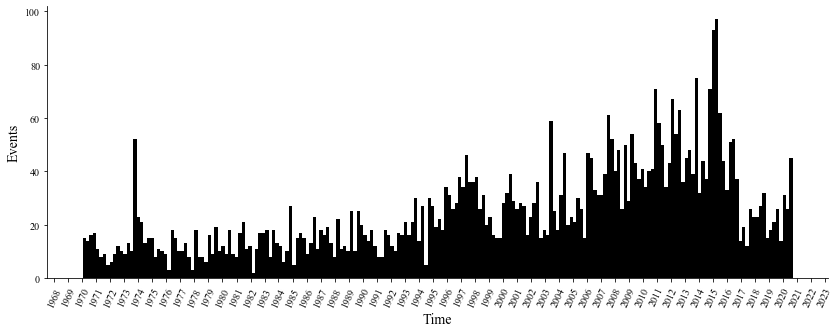

In [8]:
fig3, ax3 = plt.subplots(figsize=(14,5))
ax3.hist(mtimes, bins=210, color="black")
ax3.xaxis.set_major_locator(mdates.YearLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax3.set_xlabel("Time",**csfont, fontsize = 14)
ax3.set_ylabel("Events",**csfont, fontsize = 14)
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
plt.xticks(rotation=65)
for tick in ax3.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax3.get_yticklabels():
    tick.set_fontname("Times New Roman")
plt.show()

There is a peak of events identified between 2015 and 2016, but in general, the earthquakes occurrence is constant. There was an increase of detected earthquakes since 2006, probably because the number of seismographic stations has grown.

********

<h2> <center> 6.0 Mw event </h2> </center> 

********

We will analyse an event through seismograms, spectrograms and filtered data from five different stations.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


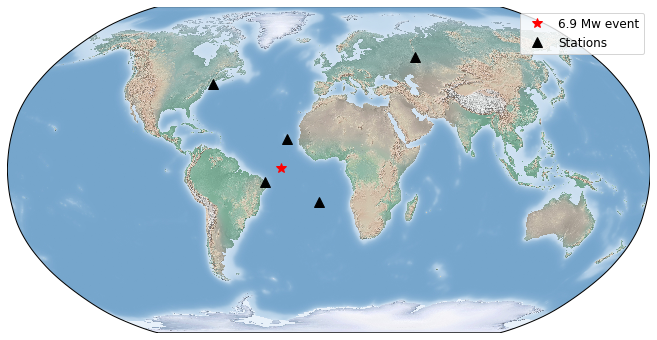

In [14]:
#this can take a while, don't worry...
plt.figure(figsize=(12,6))
m = Basemap(projection='robin', lon_0=0, resolution='l')

sta_lat = [-5.83,14.97,-15.96,42.51,56.39]
sta_lon = [-35.90,-23.61,-5.75,-71.56,58.38]

ev_lat = 0.9167
ev_lon = -26.8408

m.shadedrelief()
sta_x, sta_y = m(sta_lon, sta_lat)
ev_x, ev_y = m(ev_lon, ev_lat)
plt.plot(ev_x, ev_y, 'r*', markersize=10, label="6.9 Mw event")
plt.plot(sta_x, sta_y, 'k^', markersize=10, label="Stations")
plt.legend(fontsize=12)
plt.show()

#### Setting search parameters and plotting seismograms

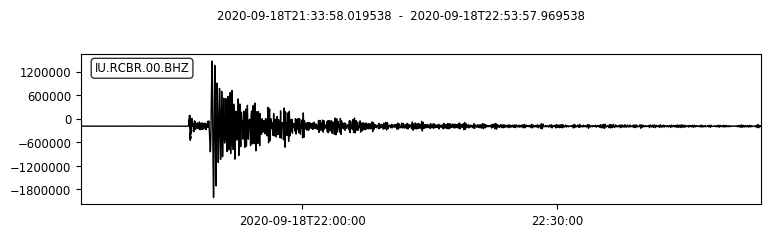

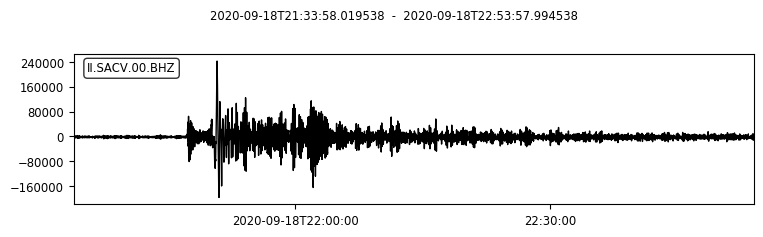

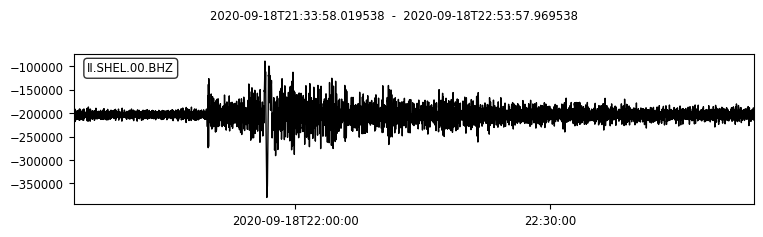

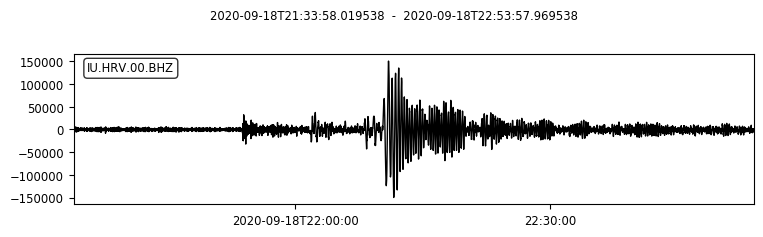

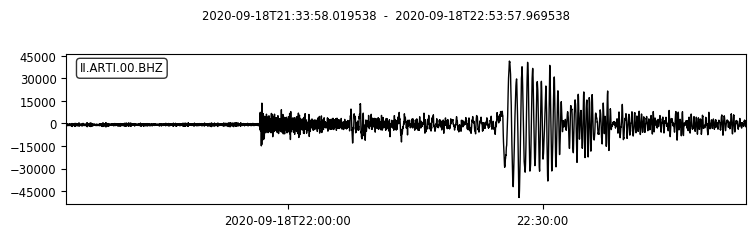

In [10]:
network = ["IU", "II", "II", "IU", "II"]
station = ["RCBR", "SACV", "SHEL", "HRV", "ARTI"]
location = "00"
channel = "BHZ"

s_time = UTCDateTime("2020-09-18T21:33:58")
e_time = UTCDateTime("2020-09-18T22:53:58")

wf = []
tr = []

for i in range(len(network)):
    waveform = client.get_waveforms(network[i], station[i], location, channel, s_time, e_time)
    wf.append(waveform)
    tr.append(waveform[0])
    fig = tr[i].plot()
    


#### Plotting spectrograms

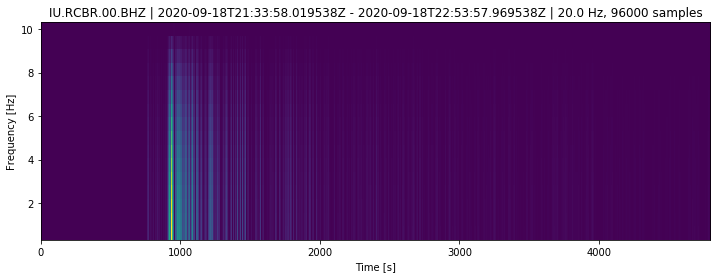

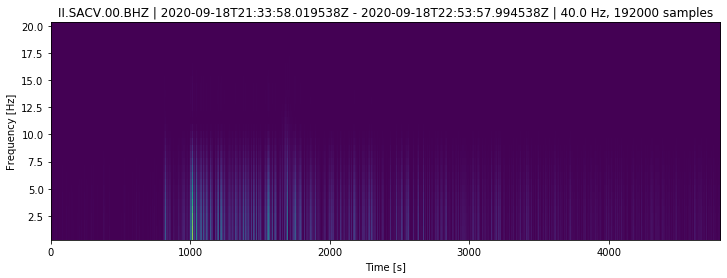

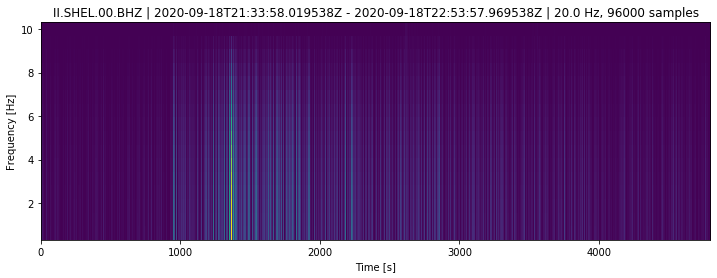

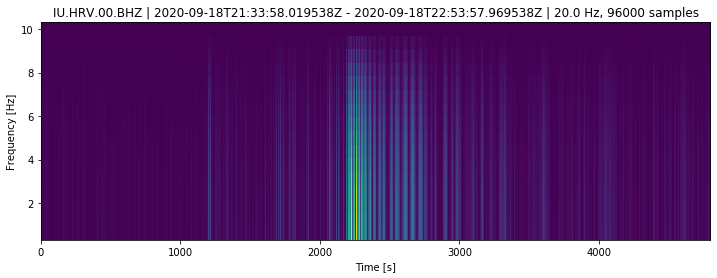

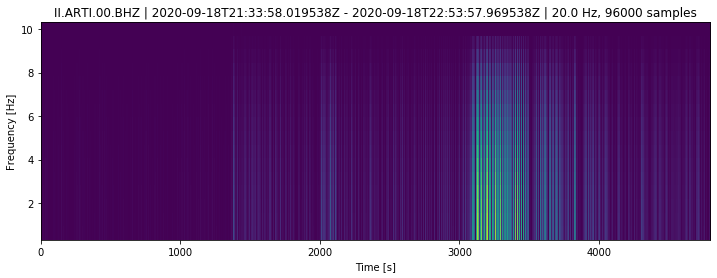

In [11]:
plt.rcParams['figure.figsize'] = (12,4)
for i in range(len(tr)):
    tr[i].spectrogram(per_lap =.5, wlen = .2)

These are Time X Frequency graphs, where blue = weak and yellow = strong. In station RCBR, there is an abrupt burst, i.e., a concentration of signal at nearly 1000 s, ranging from 0 to 9 Hz. In stations SACV and SHEL, the signal is dispersed, ranging from 0 to 10 Hz. In the other stations (HRV and ARTI), the signal is concentrated in times that match with the superficial waves.

#### Changing scales (logarithmic and dB)

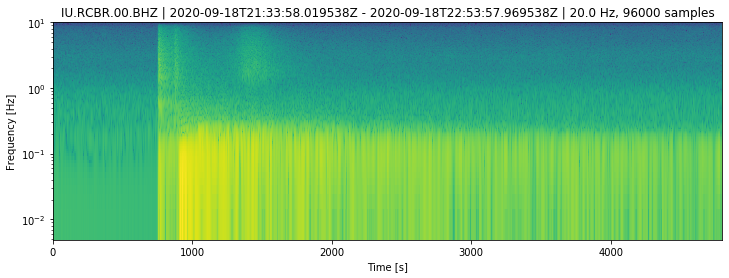

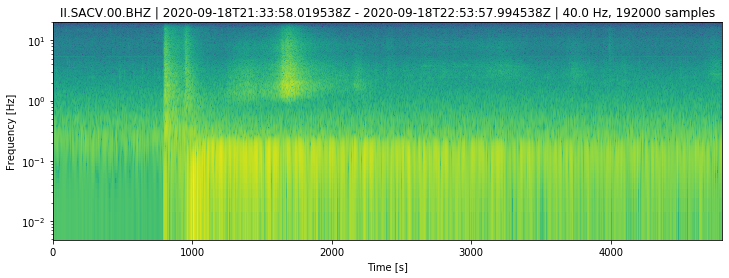

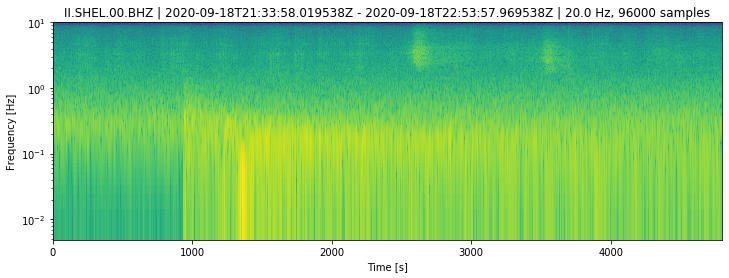

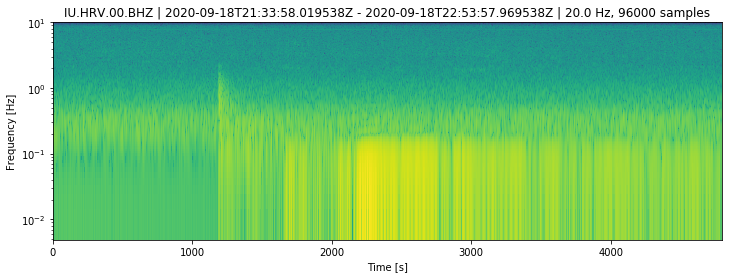

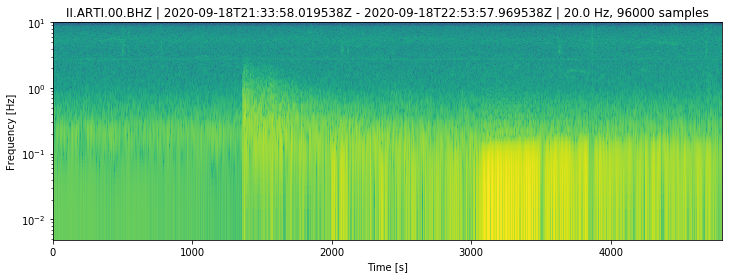

In [12]:
plt.rcParams['figure.figsize'] = (12, 4)
for i in range(len(tr)):
    tr[i].spectrogram(per_lap=.5, wlen=10, log=True, dbscale=True)

After changing the Frequency scale, we can observe that the signal of all stations is concentrated at low frequencies, ranging from 0.001 to 1 Hz. It is possible to see that the P waves have a wider content of frequencies, and it is possible to see this phase on the graphs.

In order to better identify the P waves, we can use a bandpass filter, 
removing the high frequency package from the seismograms.

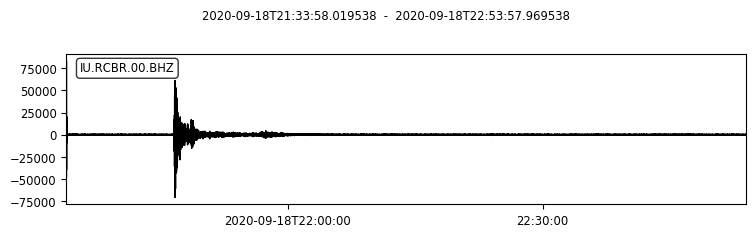

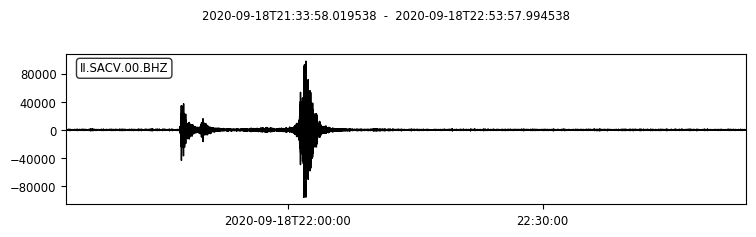

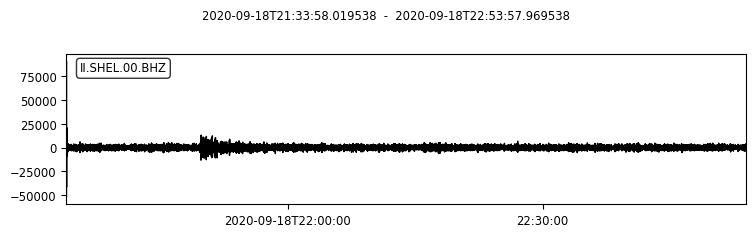

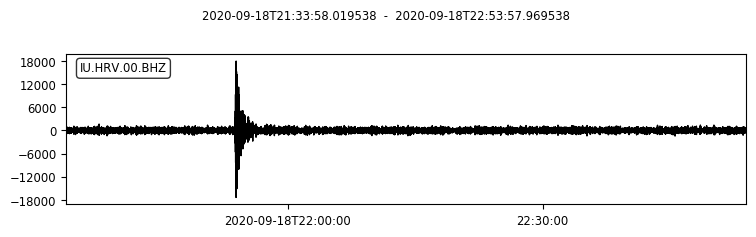

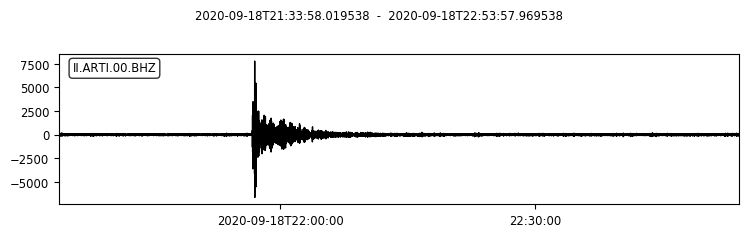

In [13]:
ftr = tr.copy()

for i in range(len(ftr)):
    ftr[i].filter(type="bandpass", freqmin = 0.5, freqmax = 2)
    fig = ftr[i].plot()

As expected, the P waves were highlighted, facilitating their eventual marking for epicentral and magnitude determination of an event.

***********

### Conclusions

Through this notebook, it was possible to identify a constant occurrence of earthquakes in the central and south mid-atlantic ridge. The events are mostly shallow, with hypocenters located in less than 40 km, which is normal for oceanic plates. We believe that installing more seismographic stations near the ridge would help to better study and understand the forces that cause the plates to move. Since 2016, only events with magnitudes grater than 4 were detected, a fact that increases the discrepancy between the number of events detected and the actual number of events occurred in the region. 

After analyzing an event that occurred in 2020, we observed that the signal strength is concentrated around the P phase at stations close to the epicenter and around the surface waves at distant stations. The average frequency of the signal is low, less than 2 Hz. Through the application of low-pass filters, we proved that the P phase is highlighted, facilitating its eventual marking. 

<b> Any queries or suggestions? Feel free to contact me! </b>

aguiar.guilherme@aluno.unb.br

***********

### Acknowledgments

I would like to express my special thanks of gratitude for Professors Mike Brudzinski, Michael Hubenthal, Shannon Fasola and Em Schnorr for their guidance and support in the Seismology Skill Building Workshop for Undergraduates, Summer 2020.

***********

### References

<i>
    
Horning, G., Sohn, R. A., Canales, J. P., & Dunn, R. A. (2018). Local seismicity of the rainbow massif on the Mid‐Atlantic Ridge. Journal of Geophysical Research: Solid Earth, 123(2), 1615-1630
    
Simao, N., Escartin, J., Goslin, J., Haxel, J., Cannat, M., & Dziak, R. (2010). Regional seismicity of the Mid-Atlantic Ridge: observations from autonomous hydrophone arrays. Geophysical Journal International, 183(3), 1559-1578.
    
Stein, S. and Okal, E. A. (1986). Seismological studies of the deformation of oceanic lithosphere, in Space Geodesy and Geodynamics, A. J. Anderson and A. Cazenave (Editors), Academic Press, London, 407-450.

Wysession, M. E., Wilson, J., Bartkó, L., & Sakata, R. (1995). Intraplate seismicity in the Atlantic Ocean Basin: A teleseismic catalog. Bulletin of the Seismological Society of America, 85(3), 755-774.</i>